# Pytorch Study
## week 1
---

## 목차
- Data definition
- Hypothesis
- Compute loss
- Gradient descent

## Lab-02. Linear Regression

In [1]:
# import 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# fix random seed
# For reproducibility
torch.manual_seed(1)

### Data definnition
training set info
- x_train(hours): 공부한 시간 
- y_train(points): 점수

<img src="images/2-1.png" width="600" height="600"/>
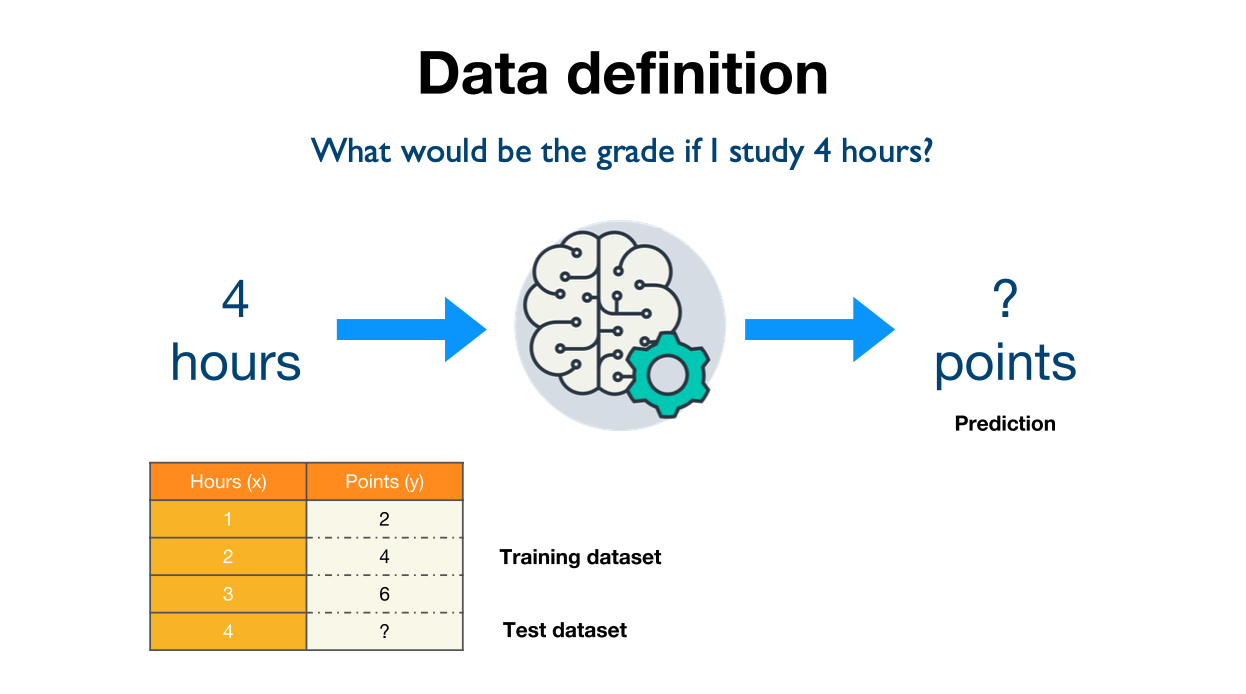

code

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [4]:
print(x_train)
print(y_train)

tensor([[1.],
        [2.],
        [3.]])
tensor([[2.],
        [4.],
        [6.]])


### Hypothesis
Hypothesis
- 주어진 x값에 대해 예측을 어떻게 할 것인가를 나타낸 식

<img src='images/2-2.png' width='600' hright='600'>
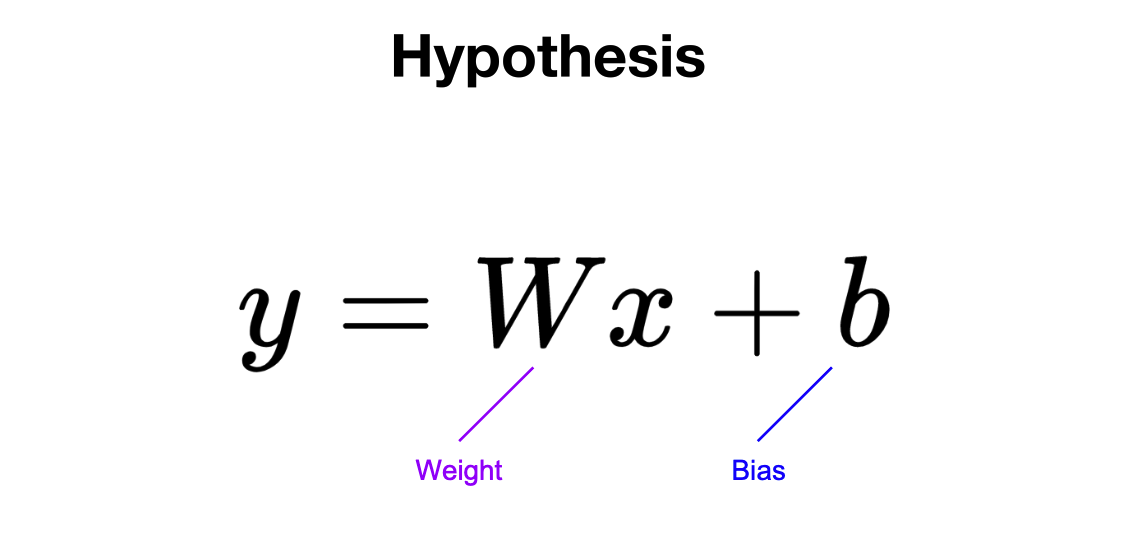

code

In [5]:
# Weight Initialization
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [6]:
# bias initalization
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


In [7]:
# Hypothesis
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### Compute loss
loss function
- Hypothesis가 y를 얼마나 잘 에측했는가를 측정하는 함수

<img src='images/2-3.png' width='600' heught='600'>
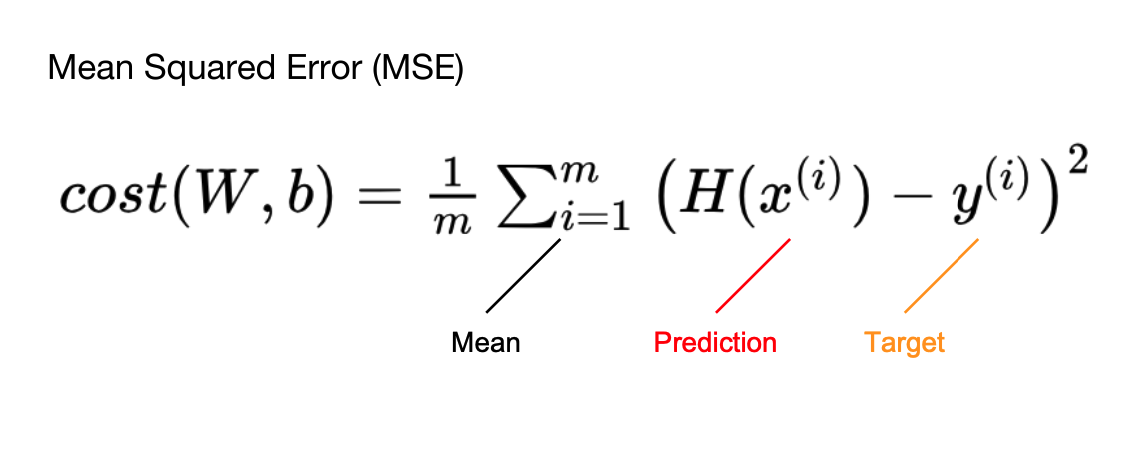

code

In [9]:
# cost
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [11]:
# pytorch
cost = F.mse_loss(hypothesis, y_train)
print(cost)

tensor(18.6667, grad_fn=<MseLossBackward0>)


### Gradient Descent
Gradient descent과정
- optimizer 생성
- zero_grad()로 gradient 초기화
- backward()로 gradient 계산
- step으로 개선
- update된 W, b값을 hypothesis에 반영
- loss확인

In [12]:
optimizer = optim.SGD([W, b], lr=0.01)

In [13]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [14]:
print(W)
print(b)

tensor([0.1867], requires_grad=True)
tensor([0.0800], requires_grad=True)


In [15]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.2667],
        [0.4533],
        [0.6400]], grad_fn=<AddBackward0>)


In [16]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(14.7710, grad_fn=<MeanBackward0>)


### High-level Implementation with nn.Module
nn.Module을 상속받아 모델만들기

In [19]:
class LinearRegressionModel(nn.Module):
    def __init__(self): # 사용할 layer 정의 
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x): # 어떨게 입력갑에서 출력삽을 계산하는지 알려줌
        return self.linear(x)

In [20]:
model = LinearRegressionModel()

### Training with Full Code

In [21]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
model = LinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: -0.008, b: 0.548 Cost: 18.562185
Epoch  100/1000 W: 1.585, b: 0.943 Cost: 0.128051
Epoch  200/1000 W: 1.674, b: 0.741 Cost: 0.079128
Epoch  300/1000 W: 1.744, b: 0.582 Cost: 0.048896
Epoch  400/1000 W: 1.799, b: 0.458 Cost: 0.030215
Epoch  500/1000 W: 1.842, b: 0.360 Cost: 0.018671
Epoch  600/1000 W: 1.876, b: 0.283 Cost: 0.011538
Epoch  700/1000 W: 1.902, b: 0.222 Cost: 0.007129
Epoch  800/1000 W: 1.923, b: 0.175 Cost: 0.004406
Epoch  900/1000 W: 1.940, b: 0.137 Cost: 0.002722
Epoch 1000/1000 W: 1.952, b: 0.108 Cost: 0.001682
